In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

df = pd.read_csv("../data/Advertising.csv", index_col=0)



In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


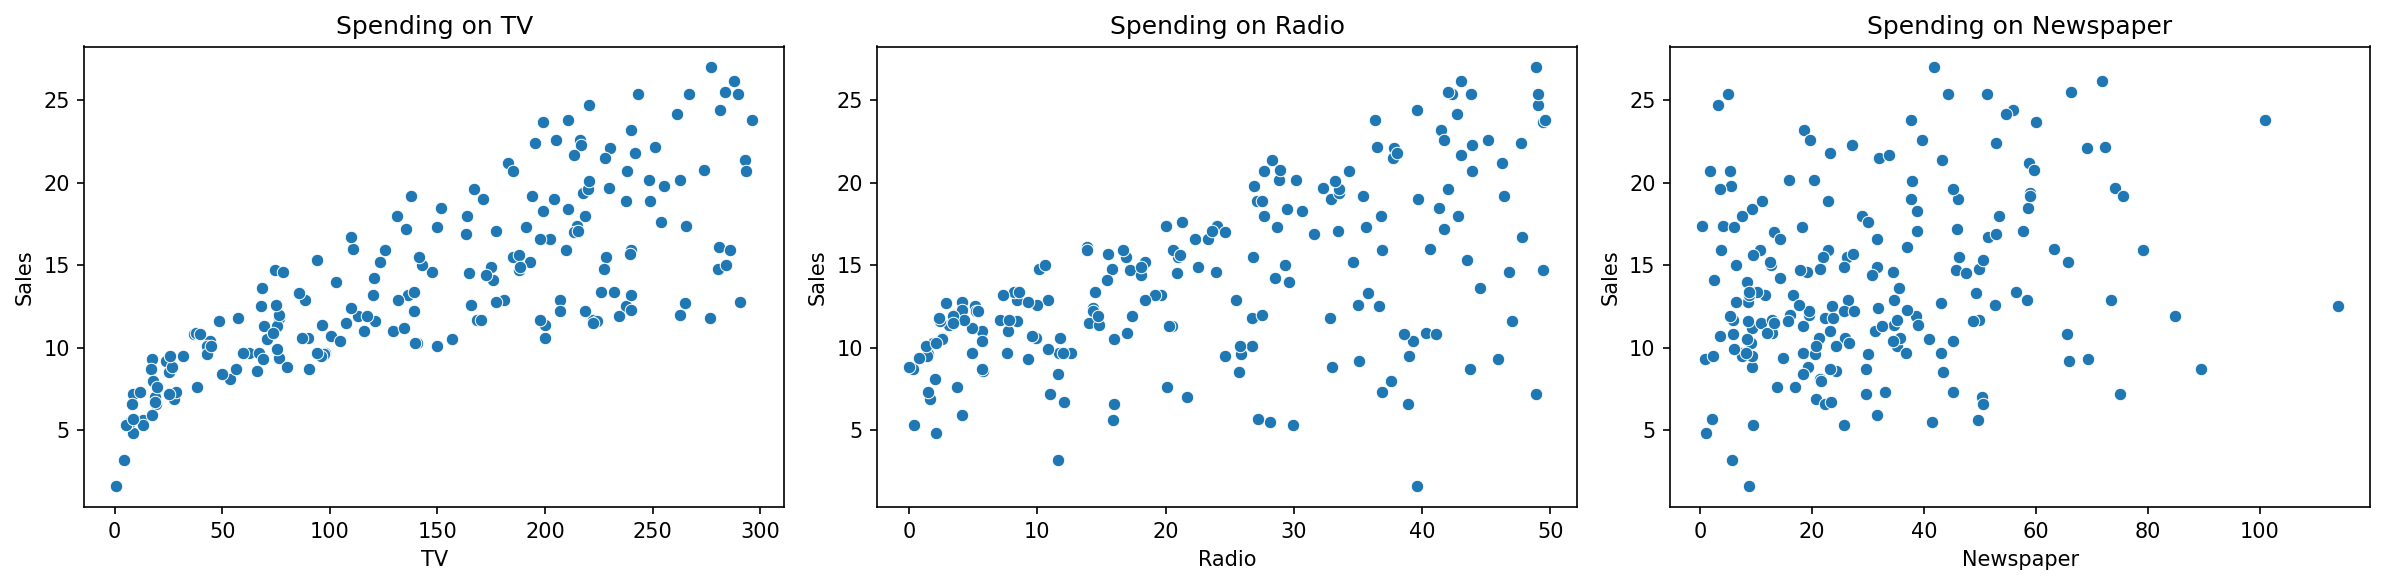

In [25]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize = (16,4), dpi = 150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

fig.tight_layout()

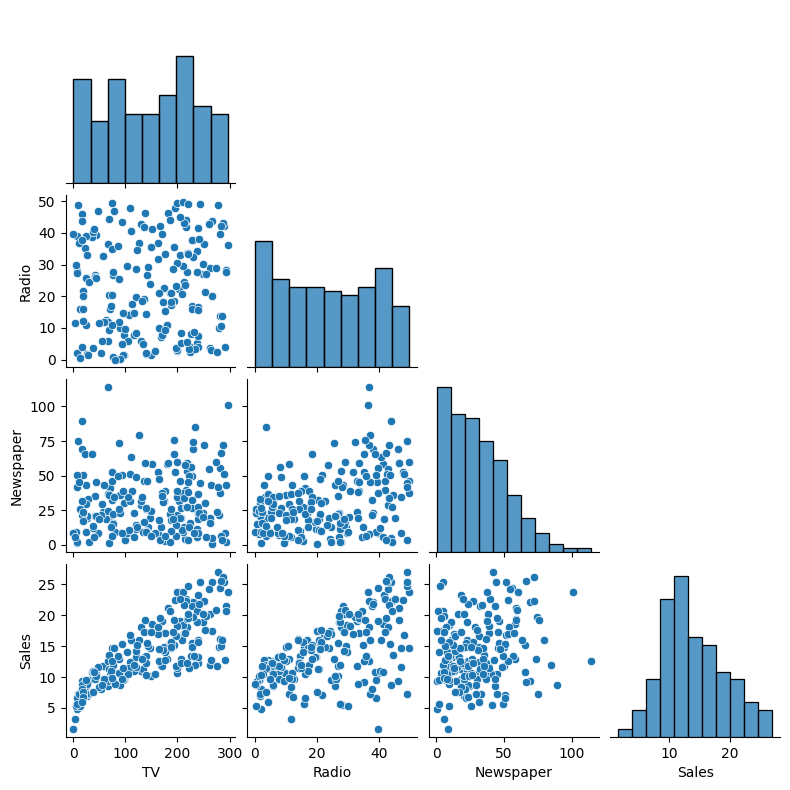

In [27]:
sns.pairplot(df, corner=True, height=2)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

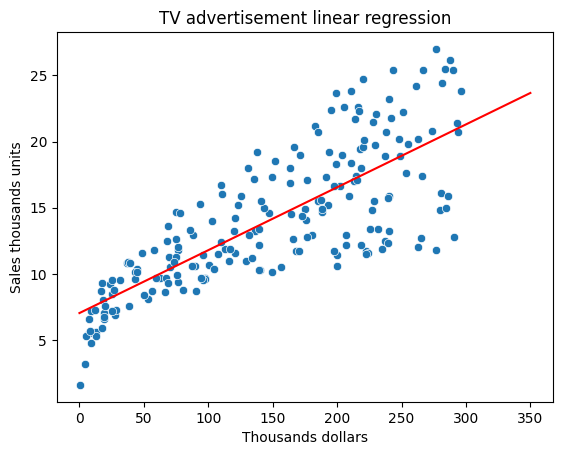

In [37]:
X, y = df["TV"], df["Sales"]

beta1, beta0 = np.polyfit(X, y, deg=1)
# beta0, beta1

# def y_hat(x):
#     beta0 + beta1 *x

# Samma fast med lambda: 

y_hat = lambda x: beta0 + beta1*x 

print(f"Intercept beta_0 hat: {beta0:.4f}")
print(f"Slope beta_1 hat: {beta1:.4f}")


spend = np.linspace(0, 350)

ax = sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title=("TV advertisement linear regression"),xlabel="Thousands dollars", ylabel="Sales thousands units")



<Axes: xlabel='TV', ylabel='Sales'>

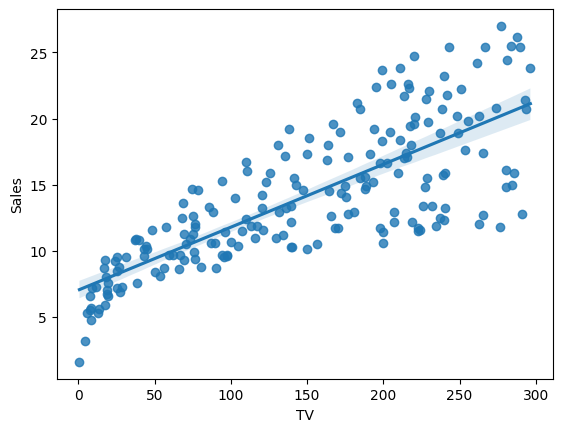

In [34]:
sns.regplot(x=X, y=y)

In [50]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

# @ is matrix multiplication in numpy

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)


test_sample = [1, 230.1, 37.8, 69.2]

y_hat =  predict(test_sample, beta_hat)

print(f"TV: $230.1k, Radio: $37.1k, Newspaper: $69.2k predicts {y_hat:.2f} thousand units")


TV: $230.1k, Radio: $37.1k, Newspaper: $69.2k predicts 20.52 thousand units
